<h2 align="center"> IPL ANALYSIS</h2>

<h3>Importing deliveries Dataset</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
deliveries=pd.read_csv("/home/rguktrkvalley/Documents/data science/deliveries.csv")
df=pd.DataFrame(deliveries)



In [2]:
print("Shape of dataset: ",deliveries.shape)
deliveries.describe()

Shape of dataset:  (260920, 17)


,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


<h3>Cleaning the dataset</h3>

In [4]:
#checking for null values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [5]:
#removing null values by dropping player_dismissed,dismissal_kind,fielder column
deliveries.drop(["player_dismissed","dismissal_kind","fielder"],axis=1,inplace=True)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0


In [6]:
#checking for missing values columns 
deliveries.isnull().sum()

match_id             0
inning               0
batting_team         0
bowling_team         0
over                 0
ball                 0
batter               0
bowler               0
non_striker          0
batsman_runs         0
extra_runs           0
total_runs           0
extras_type     246795
is_wicket            0
dtype: int64

In [7]:
#replacing extras_type column missing values with "No Extra"
deliveries["extras_type"]=deliveries["extras_type"].fillna("No Extra")
deliveries.isnull().sum()

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
extra_runs      0
total_runs      0
extras_type     0
is_wicket       0
dtype: int64

In [8]:
#checking for duplicates
deliveries.duplicated().sum() #no duplicates

0

<h3 align="center">Analysis and Visualization</h3>

<h4>1.Top 20 batters based on total runs</h4>

In [9]:
#1)top 20 batters based on total runs
total_runs=df.groupby("batter")["batsman_runs"].sum()
top_20=total_runs.sort_values(ascending=False)[0:20]
print(top_20)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
KL Rahul          4689
AM Rahane         4642
F du Plessis      4571
SV Samson         4419
AT Rayudu         4348
G Gambhir         4217
SR Watson         3880
MK Pandey         3859
SA Yadav          3594
JC Buttler        3583
Name: batsman_runs, dtype: int64


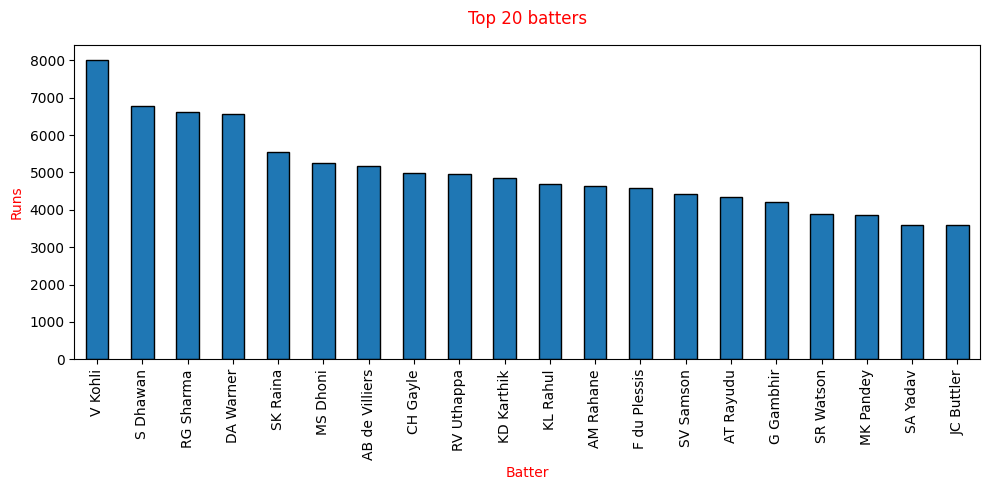

In [10]:
#visualization using barchart -top 20 batters based on total runs
plt.figure(figsize=(10,5))
top_20.plot(kind="bar",edgecolor="black")
plt.title("Top 20 batters",color="red",pad=15)
plt.xlabel("Batter",color="red")
plt.ylabel("Runs",color="red")
plt.tight_layout()
plt.savefig("Top 20 batters.png",dpi=300,bbox_inches="tight")
plt.show()

<h4>2.Top 10 Strike rate of players who played more than 100 matches</h4>

In [11]:
#2)Top 10 strike rate of players who played more than 100 matches
matches_played=df.groupby("batter")["match_id"].nunique()
balls_faced=df["batter"].value_counts()
runs=total_runs[balls_faced.keys()]
arr1=balls_faced.to_numpy()
arr2=runs.to_numpy()
strike_rate=pd.DataFrame({"batter":balls_faced.keys(),"balls_faced":arr1,"total_runs":arr2,"strike_rate":(arr2/arr1)*100})
merged_df=pd.merge(matches_played,strike_rate,on="batter")
strike_rate=merged_df[merged_df["match_id"]>100].sort_values(by="strike_rate",ascending=False).head(10)
print(strike_rate)

             batter  match_id  balls_faced  total_runs  strike_rate
39       AD Russell       104         1515        2488   164.224422
561       SP Narine       106          984        1534   155.894309
203      GJ Maxwell       128         1842        2772   150.488599
633        V Sehwag       104         1833        2728   148.827059
30   AB de Villiers       170         3487        5181   148.580442
490         RR Pant       110         2296        3297   143.597561
530        SA Yadav       135         2522        3594   142.505948
242      JC Buttler       106         2519        3583   142.238984
124        CH Gayle       141         3516        4997   142.121729
277      KA Pollard       168         2447        3437   140.457703


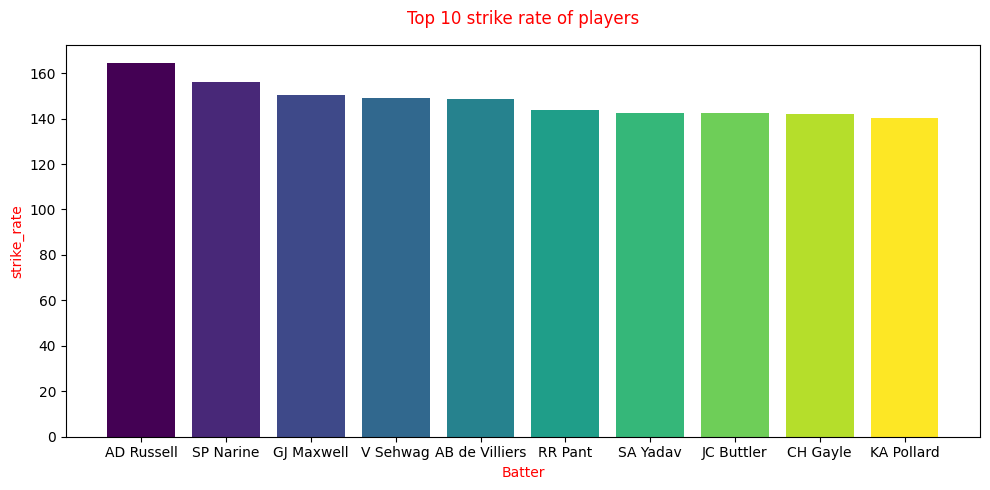

In [12]:
#visualization - barchart
plt.figure(figsize=(10,5))
colors=plt.cm.viridis(np.linspace(0,1,len(strike_rate)))
plt.bar(strike_rate["batter"], strike_rate["strike_rate"],color=colors)
plt.title("Top 10 strike rate of players",color="red",pad=15)
plt.ylabel("strike_rate",color="red")
plt.xlabel("Batter",color="red")
plt.tight_layout()
plt.savefig("Top 10 strike rate of players.png",dpi=300,bbox_inches="tight")
plt.show()


<h3>Importing matches dataset</h3>

In [13]:
data=pd.read_csv("/home/rguktrkvalley/Documents/data science/matches.csv")
matches=pd.DataFrame(data)

<h4>3.Probability of team winning the match after winning and lossing the toss</h4>

In [14]:
#3)probability of team winning the match after winning and lossing the toss
toss_win=np.sum(matches["toss_winner"]==matches["winner"])
total_matches=matches["match_type"].value_counts().sum()
probability_win=toss_win/total_matches
probability_loss=1-probability_win
print("probability of team winning the match after winning the toss:",probability_win)
print("probability of team winning the match after lossing the toss:",probability_loss)


probability of team winning the match after winning the toss: 0.5059360730593607
probability of team winning the match after lossing the toss: 0.4940639269406393


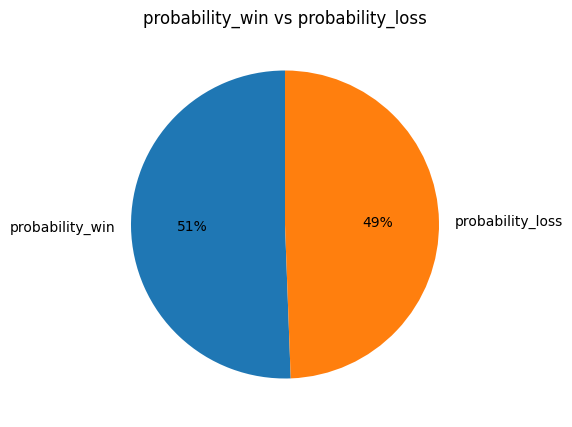

In [15]:
#visualization -pie chart
plt.figure(figsize=(10,5),facecolor="white")
values=[probability_win,probability_loss]
plt.pie(values,labels=["probability_win","probability_loss"],autopct="%1.f%%",startangle=90,textprops={"color":"black"})
plt.title("probability_win vs probability_loss",color="black")
plt.savefig("probability_win vs probability_loss.png",dpi=300,bbox_inches="tight")
plt.show()

<h4>4.Average runs scored by Virat Kohli and MS Dhoni for each season</h4>


In [16]:
#4)average runs scored by virat kohli and MS dhoni for each season

a=pd.merge(matches,df,left_on="id",right_on="match_id")
vk_md=a[a["batter"].isin(["V Kohli","MS Dhoni"])]
average_runs=pd.pivot_table(vk_md,values="batsman_runs",index=["season","batter"],columns="match_id",aggfunc="sum").mean(axis=1).unstack()
print(average_runs)


batter    MS Dhoni    V Kohli
season                       
2007/08  29.571429  13.750000
2009     25.538462  18.923077
2009/10  26.090909  23.615385
2011     30.153846  34.812500
2012     21.058824  24.266667
2013     28.812500  39.937500
2014     24.733333  25.642857
2015     21.882353  31.562500
2016     23.666667  60.812500
2017     19.333333  30.800000
2018     30.333333  37.857143
2019     34.666667  33.142857
2020/21  16.666667  31.400000
2021     10.363636  27.000000
2022     19.333333  21.312500
2023      8.666667  45.642857
2024     14.636364  49.400000


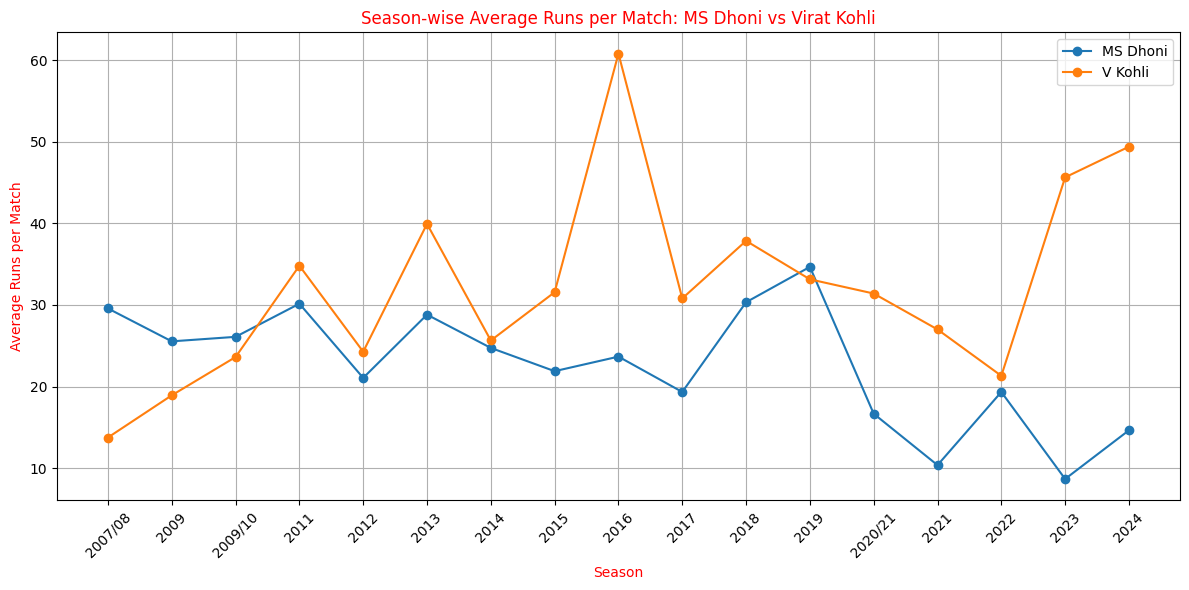

In [17]:
#visualization - linechart
plt.figure(figsize=(12,6))
plt.plot(average_runs.index,average_runs["MS Dhoni"],marker="o",label="MS Dhoni")
plt.plot(average_runs.index,average_runs["V Kohli"],marker="o",label="V Kohli")
plt.title("Season-wise Average Runs per Match: MS Dhoni vs Virat Kohli",color="red")
plt.xlabel("Season",color="red")
plt.ylabel("Average Runs per Match",color="red")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("Season-wise Average Runs per Match: MS Dhoni vs Virat Kohli.png",dpi=300,bbox_inches="tight")
plt.show()

<h4>5.Top_20 match scores scored in different stadiums</h4>

In [18]:
#5)top_20 match scores scored in different stadiums
top_20=matches.nlargest(20,"target_runs")
replaced=top_20["venue"].replace({"M Chinnaswamy Stadium":"M Chinnaswamy Stadium, Bengaluru"})
stadium_counts = replaced.value_counts().sort_values()
print(stadium_counts)


venue
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam       1
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh         1
MA Chidambaram Stadium, Chepauk                                          1
Holkar Cricket Stadium                                                   1
Himachal Pradesh Cricket Association Stadium, Dharamsala                 1
Punjab Cricket Association Stadium, Mohali                               1
Wankhede Stadium                                                         1
Zayed Cricket Stadium, Abu Dhabi                                         1
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    1
Wankhede Stadium, Mumbai                                                 1
Narendra Modi Stadium, Ahmedabad                                         1
Himachal Pradesh Cricket Association Stadium                             1
Arun Jaitley Stadiu

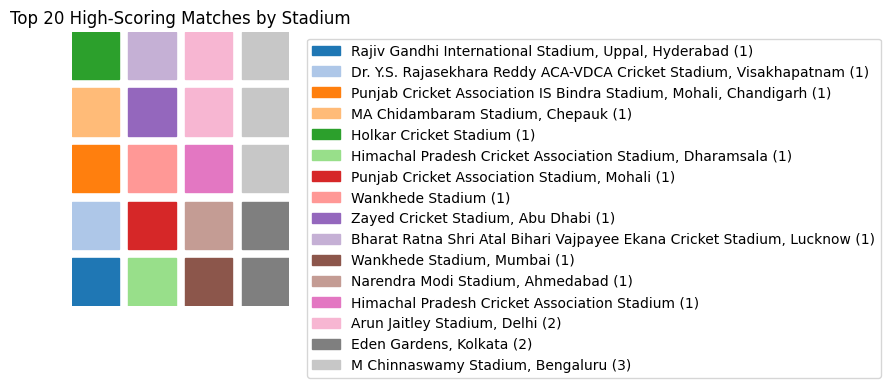

In [19]:
#visualization - using  waffle chart
data = dict(stadium_counts)

# Plot the waffle chart
plt.figure(
    FigureClass=Waffle,
    rows=5,  # number of rows in the grid
    values=data,  # counts of matches per stadium
    colors=plt.cm.tab20.colors[:len(data)],  # color palette
    labels=[f"{k} ({v})" for k, v in data.items()],  # label with count
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}  # legend outside
)

plt.title("Top 20 High-Scoring Matches by Stadium")
plt.tight_layout()
plt.savefig("Top 20 High-Scoring Matches by Stadium.png",dpi=300,bbox_inches="tight")
plt.show()
